# Deep Learning Lectures for Music Analysis

[playlist](https://www.youtube.com/playlist?list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf)

# 2- AI, Machine Learning, and Deep Learning

**Paradigms**: 
- Supervised Learning: learn by example
- Unsupervised Learning: find patterns in unstructured data
- Reinforcement Learning: learn by rewards and punishments

**Some ML algorithms**: 
- Logistic Regression
- Linear Regression
- Random Forest
- KNN
- Support Vector Machines
- Neual Networks
    - Structured in a series of neuronal layers
    - Each neuron is a computational unit
    
**Traditional ML vs DL**<br>
ML has lots of feature engineering, (relatively) small dataset, less compoutationally intensive, ideal for 'simple' problems<br>
DL handles things more end-to-end, very large dataset (1e6-7 datapoints), very resource intensive, ideal for 'complex' problems<br>

**When to use DL?**
- large dataset
- complex problem
- lots of computational resources (GPUs or TPUs)

**DL applications in audio**
- Speech recognition
- Voice-based emotion classification
- Noise recognition
- Music genre, instrument, & mood classification
- Music tagging
- Music generation

# 3 - Implementing an artificial neuron from scratch

**Biological neurons**<br> 
Dendrite - inputs<br> 
synaptic terminals - outputs<br> 

Given some inputs to the dendrites, should the synapses fire? 

**The artificial neuron**<br> 
set of inputs (x1, x2, x3) -> weight functions (w1, w2, w3) -> neuron (computation: sum + activation) -> output

**sum**<br>
$h = <x|w>$

**activation**<br> 
$y = f(h) = f(<x|w>)$<br> 
there are a ton of different ways to construct $f(h)$<br> 
one option: the *sigmoid*: $$y=\frac{1}{1+e^{-x}}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(-6, 6, step=0.01)
y = lambda x: 1/(1+np.exp(-x))
plt.plot(x, y(x));
plt.title("Sigmoid")
plt.grid(); 

Modulating all inputs into an output between 0 and 1

for multiple variables / weights: 
$$y=\frac{1}{1+e^{-(<x|w>)}}$$

**Implement the neuron**

In [ ]:
import math

inputs = [.5, .3, .2]
weights = [.4, .7, .2]

#activate = lambda inputs, weights: 1/(1+np.exp(-np.dot(inputs, weights)))

def sigmoid(x): 
    
    y = 1.0 / (1 + math.exp(-x))
    return y

def activate(inputs, weights): 
    
    # Perform net input.
    h = 0
    for x, w in zip(inputs, weights): 
        h += x*w
    
    # perform activation
    return sigmoid(h)
    
output = activate(inputs, weights)

print(output)

# 4 - Vector and Matrix Operations

*(already comfortable with this, taking minimal notes)*

**Vector**
- Array of numbers

**Scalar operations**
- vector and a number
- Addition, subtraction, multiplication, division

**Vector addition / subtraction**
- Must have the same dimension
- Element-wise operation

**Dot product**

**Matrices**
- Dimension = (#rows, #columns)
- Transposition = switch rows and columns

**Scalar operations on matrices**

**Matrix addition / subtraction**
- element-wise - must have the same dimensions

**Matrix Multiplication**
- \# cols on 1st matrix = \# rows on 2nd matrix
- (m, n) matrix x (n, k) matrix = (m, k) matrix

# 5 - Computation in Neural Networks

**The artifical neuron**
- Single neuron works well for linear problems
- Real-world problems are complex
- ANNs can reproduce highly nonlinear functions

**Components of an ANN**
- Neurons
- Input, hidden, output layers
- Weighted connections
- Activation functions

**Multilayer Perceptron (MLP)**

1 hidden layer -> 1 or more hidden layers -> output layer

Computation:<br> 
- weights
- net inputs (sum of weighted inputs)
- activations (output of neurons to next layer)<br>
<br>
- use a matrix to hold weights
$$\vec{h}^{(2)} = \vec{x}W^{(1)}$$

**Activation**
$$\vec{a}^{(2)} = f(\vec{h}^{(2)})$$

# 6 - Implementing a neural network from scratch

Project idea: generate a visualization of an ANN

In [ ]:
import numpy as np

class MLP: 
    
    # Constructor
    def __init__(self, num_inputs=3, num_hidden=[3, 5], num_outputs=2):
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        # Each item in this list is the number of neurons in that layer
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
        
        # Initiate random weights
        self.weights = []
        for i in range(len(layers)-1): 
            
            # Create a matrix of random numbers representing the weights between 2 layers
            w = np.random.rand(layers[i], layers[i+1])
            self.weights.append(w)
            
    def forward_propagate(self, inputs): 
        activations = inputs
        
        for w in self.weights: 
            # calculate net inputs
            net_inputs = np.dot(activations, w)
            
            # calculate the activations
            activations = self._sigmoid(net_inputs)
        return activations
    
    def _sigmoid(self, x): 
        y = 1.0 / (1 + np.exp(-x))
        return y

In [ ]:
# Create MLP 
mlp = MLP()

# Create some inputs
inputs = np.random.rand(mlp.num_inputs)

# perform forward pro
outputs = mlp.forward_propagate(inputs)

# print the results
print("inputs: ", inputs)
print("outputs: ", outputs)

Well this is all well and good- but how do we actually train this thing?

# 7 - Training a neural network: Backward propagation and gradient descent

- Foreward: input signals
- Backward: error signals
- calculate using error or loss function (using quadratic in this example) $E = E(p, y) = \frac{1}{2}(p-y)^2$
- Calculate gradient of error functions: $\frac{\partial E}{\partial W^{(n)}}$

**Calculate gradient of error function**<br>
$F = F(x, W)$<br>
$E = E(p, y) = E(F(x, W), y)$
<br><br>
Use the chain rule: 
$$\frac{\partial E}{\partial W^{(2)}} = 
\frac{\partial E}{\partial a^{(3)}}
\frac{\partial a^{(3)}}{\partial h^{(3)}}
\frac{\partial h^{(3)}}{\partial W^{(2)}}$$
<br> 
- See the rest of the derivation in the video- I don't feel like putting all that in mathjax

**Update the parameters**
- Use *Gradient Descent*
- Take a step in opposite direction to gradient
- Step size = learning rate

# 8 - Training a neural network: implementing backpropagation and gradient descent from scratch

In [ ]:
import numpy as np

# Train our network with some dummy dataset
# Make some predictions

class MLP(object): 
    """A Multilayer Perceptron class.
    """
    
    # Constructor
    def __init__(self, num_inputs=3, num_hidden=[3, 5], num_outputs=2):
        """Constructor for the MLP. Takes the number of inputs, 
            a variable of hidden layers, nd number of outputs.
            
        Args: 
            num_inputs (int): Number of inputs
            hidden_layers (list): A list of ints for the hidden layers
            num_outputs (int): Number of outputs
        """
        
        self.num_inputs = num_inputs
        self.num_hidden = num_hidden
        self.num_outputs = num_outputs
        
        # Create a generic representation of the layers
        layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]
        
        # Create random connection weights for the layers
        self.weights = []
        for i in range(len(layers)-1): 
            
            # Create a matrix of random numbers representing the weights between 2 layers
            w = np.random.rand(layers[i], layers[i+1])
            
            self.weights.append(w)
            
        # Save activations per layer. 
        activations = []
        for i in range(len(layers)): 
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
            
        
        # Save derivatives per layer
        derivatives = []
        for i in range(len(layers)-1): 
            d = np.zeros((layers[i], layers[i+1]))
            derivatives.append(d)
        self.derivatives = derivatives
        
    def forward_propagate(self, inputs): 
        """Computes forward propagation of the network based on input signalsl.
        
        Args: 
            inputs (ndarray): Input signals
        Returns: 
            activations (ndarray): Output values
        """
        
        # The input layer activation is just the input itself
        activations = inputs
        
        # save the activations for back propogation
        self.activations[0] = inputs
        
        # Iterate through the network layers
        for i, w in enumerate(self.weights): 
            
            # calculate matrix multiplication between the previous activation and weight matrix
            net_inputs = np.dot(activations, w)
            
            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)
            
            # save the activations for back propogation
            self.activations[i+1] = activations
            
        # return output layer activation
        return activations
    
    def back_propagate(self, error, verbose=False): 
        
        # dE/dW_i = (y - a_[i+1]) s'(h_[i+1]) a_i
        # s'(h_[i+1]) = s(h_[i+1])(1 - s(h_[i+1]))
        # s(h_[i+1]) = a_[i+1]
        
        # dE/dW_[i-1] = (y - a_[i+1]) s'(h_[i+1]) W_i s'(h_i) a_[i-1]
        # dE/dW_[i-1] = dE/dW_i 
        
        for i in reversed(range(len(self.derivatives))):
            
            # get activation for previous layer
            activations = self.activations[i+1]
            
            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)
            
            # reshape delta so its a 2D array
            delta_re = delta.reshape(delta.shape[0], -1).T
            
            # get activations for the current layer
            current_activations = self.activations[i]
            
            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0], -1)
            
            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)
            
            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)
            
            if verbose: 
                print("Derivatives for W{}: {}".format(i, self.derivatives[i]))
        return error
    
    def gradient_descent(self, learning_rate):
        
        for i in range(len(self.weights)): 
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learning_rate
    
    def train(self, inputs, targets, epochs, learning_rate):
        
        for i in range(epochs): 
            sum_error = 0
            
            for input, target in zip(inputs, targets): 
                
                # forward propagation
                output = self.forward_propagate(input)
                
                # calculate error
                error = target - output
                
                # back propagation
                self.back_propagate(error)
                
                # apply gradient descent
                self.gradient_descent(learning_rate)
                
                sum_error += self._mse(target, output)
            
            # report the error
            print("Error: {} at epoch {}".format(sum_error / len(inputs), i))
            
    def _mse(self, target, output): 
        return np.average((target - output)**2)
    
    def _sigmoid_derivative(self, x):
        return x * (1.0 - x)
        
        
    def _sigmoid(self, x): 
        """Sigmoid activation function
        Args: 
            x (float): value to be processed
        Returns:
            y (float): Output
        """
        
        y = 1.0 / (1 + np.exp(-x))
        return y

In [ ]:
# create an mlp
mlp = MLP(2, [5], 1)

# create dummy data
input = np.array([0.1, 0.2])
target = np.array([0.3])

# create a dummy dataset
from random import random
items = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in items])
# train our mlp
mlp.train(items, targets, 50, 0.1)

In [ ]:
# make some predictions
inputs = np.array([0.3, 0.1])
target = np.array([0.4])
output = mlp.forward_propagate(inputs)
print()
print()
print("Our network believes that {} + {} is equal to {}".format(inputs[0], inputs[1], output[0]))

# 9 - How to implement a (simple) network with TensorFlow 2

**keras** = high level library on top of TensorFlow

**Sequantial** = input signal moves left to right

**layers.Dense()** = fully connected layer

In [ ]:
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
import tensorflow as tf


def generate_dataset(num_samples, test_size):
    x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
    y = np.array([[i[0] + i[1]] for i in x])

    # split into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = generate_dataset(5000, 0.3)

# build model: 2 -> 5 -> 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_dim=2, activation="sigmoid"), 
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile model
optimiser = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimiser, loss="MSE")

# train model
model.fit(X_train, y_train, epochs=100)

# evaluate model
print("\n\nModel evaluation:")
model.evaluate(X_test, y_test, verbose=1)

# make predictions
# make some predictions
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)
print("\nSome predictions:")
for d, p in zip(data, predictions): 
    print("{} + {} = {}".format(d[0], d[1], p[0]))

Note that the evaluation is slightly worse than training set- this is normal. Model is optimized for the training set. If the losses are too far apart, that is a sign of overfitting. 

# 10 - Understanding audio data for deep learning

Sound -> waveform -> Time vs. Amplitude<br> 

**Some equations**
$$f = \frac{1}{T}$$
<br>
$$y(t) = Asin(2\pi f t + \phi)$$

- $\phi$ = phase (shift right or left)
- higher frequency -> higher pitch
- larger amplitude -> louder

Sound is analog - can't store it -> perform Analog digital conversion (ADC)<br> 
- Signal sampled at uniform time intervals<br> 
- Amplitude quantised with limited number of bits<br> 
    - Project volume of analog sound wave to closest bit<br> 
- errors will accumulate
    - more bits + higher sample rate + higher analog quality = less error
- Metrics: 
    - Sample rate = 44,100 Hz (default sample rate)
    - Bit depth = 16 bits / channel
    
    
**Real world sound waves**<br> 
NOT simple<br> 

**Fourier Transform**<br> 
- Any sound wave is a linear combination of sine waves of different frequencies- decompose the sound wave into a list of magnitudes of each frequency

ex: 
$$s = A_1sin(2\pi f_1t + \phi_1) + A_2sin(2\pi f_2t + \phi_2) + A_3sin(2\pi f_3t + \phi_3) + ...$$

- **GOAL**: Find a list of $A_n$ - this is the contribution of each frequency to the overall signal

- Time vs Amplitude -> Frequency vs. Magnitude
- From time domain to frequency domain
- No time information

**Short Time Fourier Transform (STFT)**
- Many FFTs at different intervals
- Keeps time info
- Fixed frame size (ex 2048 samples)
- Gives a spectrogram (time + frequency + magnitude)

Q: can the frames of an STFT overlap for better resolution? E.g: frame 1 has samples 0-2048, frame 2 has samples 256-2304, frame 3 has samples 512-2560, ect. A: this is the norm, see section 11

**DL prep-processing pipeline for audio data**
- Waveform -> spectrogram -> neural network
- Previously, there was a LOT of feature engineering to get amplitude envelope, spectral centroid, 0-crossing rate, spectral flux, ect. to plug into an ML model
- With an ANN, just plug in the spectrogram and train (this is how NNs are considered an end-to-end method)

**Mel Frequency Cepstral Coefficients (MFCCs)**
- Capture timbral / textural aspects of sound
- Frequency domain feature
- approximate human auditory system
- 13-40 coefficients
- Calculated at each frame
- Complicated to extract (don't worry about implementation, just know how to use them from a high-level perspective)

**MDCC applications**
- Speech recognition
- Music genre classification
- Music instrument classification

# 11 - Preprocessing audio data for machine learning

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt

file = "blues.00000.wav"
signal, sr = librosa.load(file, sr=22050)
# signal = 1D np array, num_samples = sr*T = 22050*3

# Waveform
librosa.display.waveplot(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [ ]:
import numpy as np

# fft -> spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
plt.plot(frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show(); 

This plot is perfectly symmetric!<br> 
explained by nyquist theorem<br> 
Basically we don't need the whole plot, just the left part

In [ ]:
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show(); 

In [ ]:
# stft -> spectrogram
# number of samples per fft (i.e. window size)
n_fft = 2048
hop_length = 512 # amound by which we are shifting each fourier transform to the right

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show(); 

Most of the frequencies have a very very low amplitude, but there are some bursts at the lower frequencies (expected from the power spectrum)

Use a logarithmic plot to get a more sensible result

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show(); 

In [ ]:
# MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)

plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()
plt.show(); 

# 12 - Music genre classification: Preparing the dataset

Dataset [here](https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification)

Each genre has 100 30 second snippets

Download the dataset using the kaggle API. This requires a kaggle account. Instructions can be found [here](https://www.kaggle.com/docs/api).

As this code was already run and the dataset downloaded, I will leave this commented out so it's not accidentally run again

In [ ]:
# from kaggle.api.kaggle_api_extended import KaggleApi
# import os
# from zipfile import ZipFile
# api = KaggleApi()
# api.authenticate()

# # delete the folder if it already exists
# if os.path.exists('genre_classification_dataset'): 
#     shutil.rmtree('genre_classification_dataset')
    
# api.dataset_download_files("andradaolteanu/gtzan-dataset-music-genre-classification")
# zf = ZipFile('gtzan-dataset-music-genre-classification.zip')
# zf.extractall('genre_classification_dataset\\')
# zf.close()

Define a high-level function to save the mfccs

In [ ]:
import os
import librosa
import math
import json

DATASET_PATH = "genre_classification_dataset\\Data\\genres_original\\"
JSON_PATH = "data.json"

SAMPLE_RATE = 22050
DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # num_segments: for deep learning models, you need a LOT of data, 100 tracks per genre isn't much- so
    # we split each track into several segments to get more input data
    
    # dictionary to store data
    # mfccs are the training inputs
    # mapping are the outputs
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)
    
    # loop through all the genres
    # os.walk recursively goes through all the folers in the dataset
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        # ensure that we're not at the root level
        if dirpath is not dataset_path: 
            
            # save the semantic label
            dirpath_components = dirpath.split("/") # genre/blues => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            
            # process files for a specific genre
            for f in filenames:
                
                # load the audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                
                # process segments extracting mfcc and storing data
                for s in range(num_segments): 
                    
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment
                    
                    # store mfcc for segment if it has the expected length
                    
                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], 
                                                sr=sr, 
                                                n_fft=n_fft, 
                                                n_mfcc=n_mfcc, 
                                                hop_length=hop_length)
                    # take the transpose
                    mfcc = mfcc.T
                    
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment: 
                        data["mfcc"].append(mfcc.tolist())
                        
                        # first iteration was for the dataset path, so i-1
                        data["labels"].append(i-1)
                        print("{}, segment: {}".format(file_path, s))
    with open(json_path, "w") as fp: 
        json.dump(data, fp, indent=4)

In [ ]:
# # keep this commented as it takes a while to run
# save_mfcc(dataset_path=DATASET_PATH, json_path=JSON_PATH, num_segments=10)

# 13 - Implementing a neural network for music genre classification

- Using MLP

In [ ]:
import json
import numpy as np 

def load_data(dataset_path): 
    with open(dataset_path, "r") as fp: 
        data = json.load(fp)
    
    # convert lists into numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs, targets

# load the data
inputs, targets = load_data(JSON_PATH) 

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

# split into train and test set
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

# build the network architecture
model = keras.Sequential([
    # input layer                    # flatten this 2D array, intervals x values of MFCCs for that interval
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layer  
    keras.layers.Dense(512, activation="relu"), 
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu"), 
    
    # 3rd hidden layer
    keras.layers.Dense(64,  activation="relu"),
    
    # output layers- 1 neuron for each genre
    keras.layers.Dense(10, activation="softmax")
])

# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

## Rectified Linear Unit (ReLU)


$$\operatorname{ReLu}(h) = 
\begin{cases}
0, & \text{if } h \lt 0 \\
h, & \text{if } h \ge 0
\end{cases}
$$

- better convergence
- reduce likelihood of *vanishing gradient*

**Vanishing Gradient**<br> 
When we train a network, we back propagate the error from the output to input. Every time we have a new layer, we multiply by the derivative of the activation funciton. The maximum derivative of the sigmoid function is 0.25, so as you go through the network, the gradient gets smaller and smaller. With ReLU, we avoid these issues. 

## Softmax

- Pick the neuron that has the highest value

## Adam

- variation of SGD

# Types of Batching

- Stochastic
    - Calculate gradient on 1 sample
    - Quick, but inaccurate
    
- Full batch
    - Compute gradient on whole training set
    - Slow, memory intensive, accurate
- Mini-batch
    - compute gradient on a subset of the dataset (16-128 samples)
    - best of the 2 worlds

In [ ]:
# train the network, store the output in history
history = model.fit(inputs_train, targets_train, 
          validation_data=(inputs_test, targets_test), 
          epochs=50, 
          batch_size=32)

Accuracy: 96%, validation accuract: 63%<br> 

looks like there's a bit of overfitting

# 14 - Solving overfitting in neural networks

how can you identify overfitting? 

In [ ]:
import matplotlib.pyplot as plt

# build plot_history function
def plot_history(history): 
    fig, axs = plt.subplots(2, figsize=[20, 10])
    
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"],     label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_ylim([0, 1])
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error subplot
    axs[1].plot(history.history["loss"],     label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("error")
    axs[1].set_xlabel("epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("error eval")
    
# plot accuracy and error over the epochs
plot_history(history)

slightly increasing test error + plateauing test accuracy = overfitting

### Techniquest to solve overfitting

- Simpler architecture
- Data augmentation
- Early stopping
- Dropout 
- Regularization

**Simpler architecture**
- Remove layers
- Decrease # of neurons
- No universal rule :(

- General approach: try starting with a very simple model and gradually build it up

**Data Augmentation**
- Artificially increase # of training samples
- Appoly transformations to audio files
    - Pitch shifting
    - Time stretching
    - Adding background noise
- Do this on the train set ONLY

**Early stopping**
- Choose rules to stop training
- ex: If test error doesn't improve after x iterations, then stop training

**Dropout**
- Randomly drop neurons while training
- Increased network robustness

Ex: take a fully connected dataset -> randomly drop certain neurons and just do the training on those remaining connections (this is done stochastically)

*Why does this work?*<br> 
Network can't rely on certain neurons too much<br> 
- dropout probability: 0.1-0.5

**Regularization**
- Add penalty to error function
- Punish large weights
- L1 and L2

**L1 regularization**
- Minimize the absolute value of the weights
- Robust to outliers
- Generates simple model 

**L2 regularization**
- Minimises squared values of the weights
- Not robust to outliers
- Learns complex patterns

*Which regularization to use*?<br> 
If you have "simple to train" data, then go with L1. If it's more complex, more difficult patterns, ect, go with L2. <br> 
For music, you normally want L2

Now implement dropout and regularization with tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

# split into train and test set
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.3)

# build the network architecture
model = keras.Sequential([
    # input layer                    # flatten this 2D array, intervals x values of MFCCs for that interval
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    
    # 1st hidden layer  
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),               
    keras.layers.Dropout(0.3), 
    
    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)), 
    keras.layers.Dropout(0.3),
    
    # 3rd hidden layer
    keras.layers.Dense(64,  activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # output layers- 1 neuron for each genre
    keras.layers.Dense(10, activation="softmax")
])

# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])
model.summary()

# train the network, store the output in history
history = model.fit(inputs_train, targets_train, 
          validation_data=(inputs_test, targets_test), 
          epochs=50, 
          batch_size=32)

# plot accuracy and error over the epochs
plot_history(history)

Much better!

Now implement a more complex neural network

# 15 - Convolutional Neural Networks Explained Easily

**CNNs**
- Mainly used for processing images
- Perform better than multilayer perceptron
- Less parameters than dense layers

*Why?*
- Image data is structured
    - Edges, shapes
    - Translation invariance
    - Scale invariance
- CNN emulates human vision system
- Components on a CNN learn to extract different features

**CNN Components**
- Convolution
- Pooling

**Convolution**
- *Kernel* = grid of weights
- Kernel is "applied" to the image
- Traditionally used in image processing

Explanation: 

Start from a greyscale image. This is a 2d array of numbers ranging from 0-255 (each entry = 1 pixel, value = intensity).

Take that image and apply a kernel (some function?)<br> 
image -> kernel -> output (with same size as original image)<br> 
Is this just matrix multiplication?<br> 
Overlay kernel on top of the image, center it around some pixel<br> 
The value of the kernel lands at the same position as the input on the outptut
$$
\text{Kernel output} = \sum_{i=1}^{P}{\text{image}_i \cdot K_i}
$$

**NOTE: MAY NEED TO DIVIDE BY NUMBER OF SAMPLES**

Essentially, the output of the kernel is a function of the selected points and the points AROUND that 

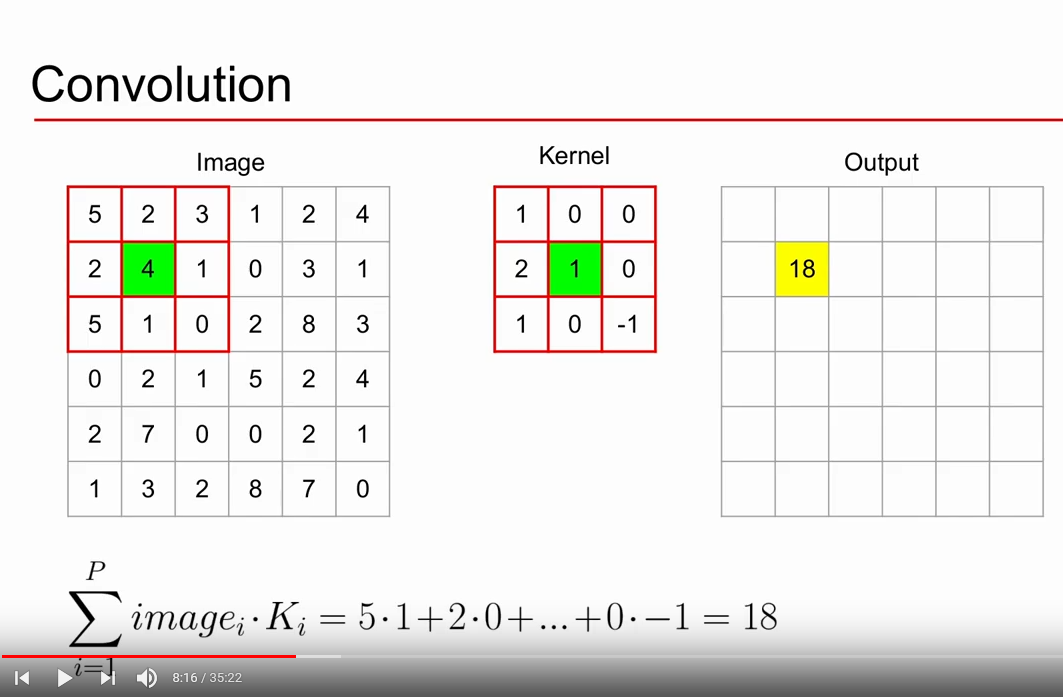

Then slide the kernel to be centered at the next index: 

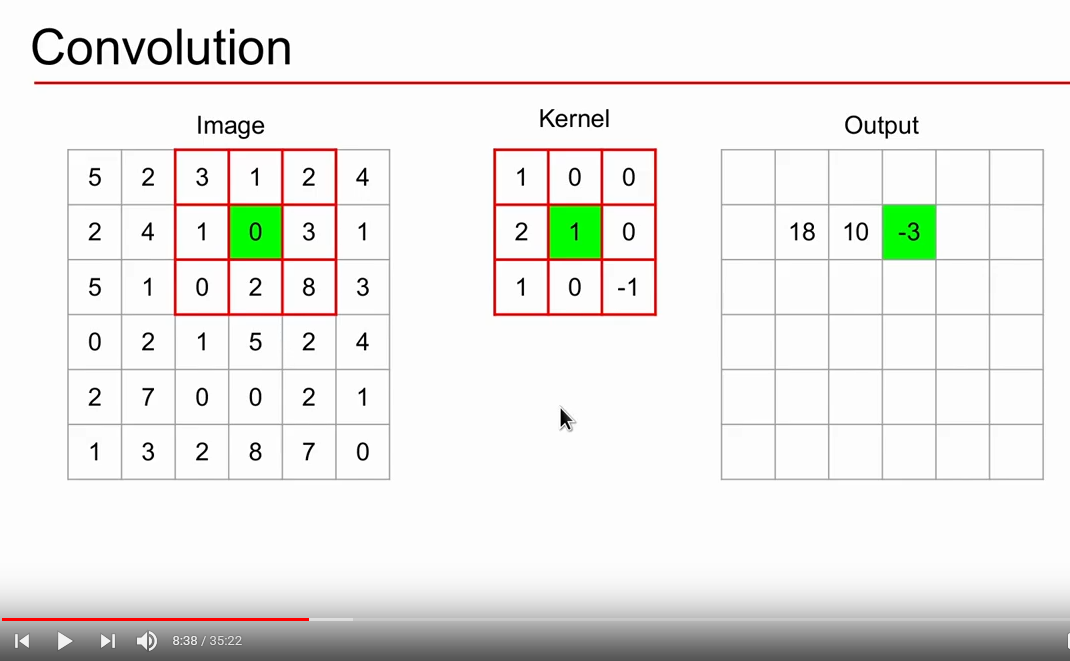

So now we have answers for everything but the edges, where the whole kernel can't be calculated.<br>
Usually, apply zero padding around the outside of the original image. 

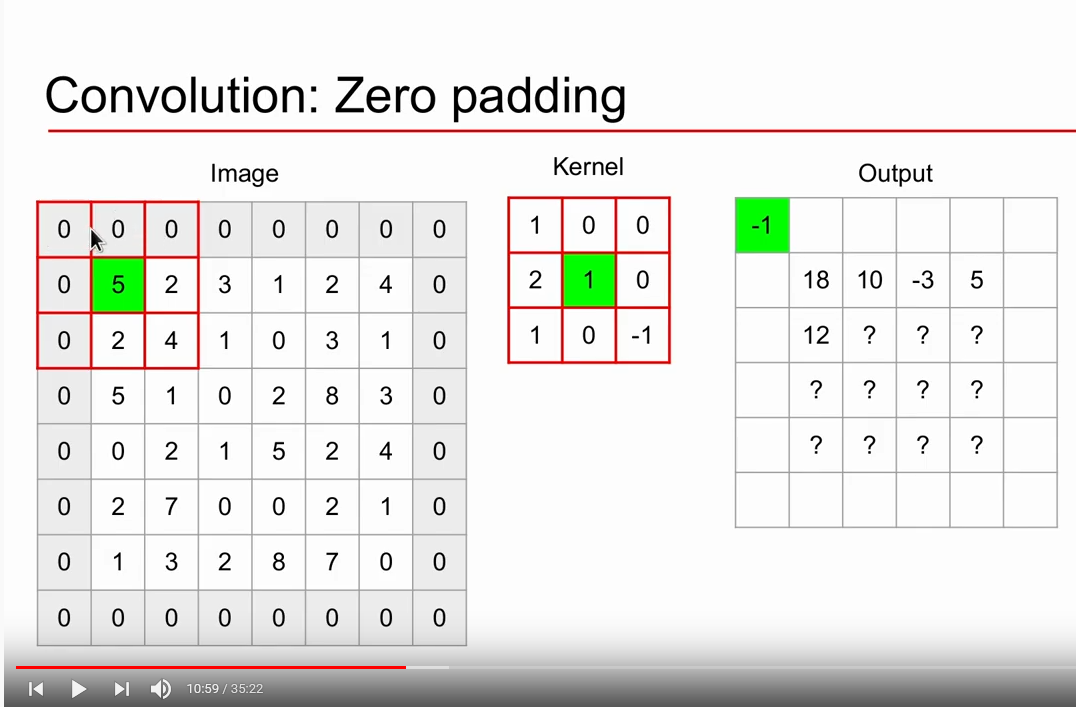

**Kernels**
- Feature detector
- Kernels are learned
ex: Oblique line detector, or vertical line detector

With a CNN, extract features using kernels- but we don't have to hardwire them! The network itself learns the kernel

*what does it mean to learn the kernel?*
train the CNN to get the values

**Architectural decisions for convolution**
- Grid size
- Stride
- Depth
- Number of Kernels

**Grid size**
- Number of pizels for height/width
- Odd numbers (why?)
- because with odd numbers, there's a center for reference

**Stride**
- Step size used for sliding kernel on image
- Indicated in pixels
- Can specify both horizontal and vertical stride (but usually they're the same)

**Depth**
- grayscale: depth=1
- color (RGB): depth=3 (since each pixel has 3 values) 
    - ex: kernel = 3x3x3, so 27 weights

**# of kernels**
- A conv layer has multiple kernels
- Each kernel outputs a single 2D array
- Output from a layer has as many 2D arrays as # of kernels

**Pooling**
- Downsample the image
- Overlaying grid on image
- Max/average pooling (different options, these are the most used, max pooling is the main one)
- No parameters

**Pooling Settings**
- Grid size
- Stride
- Type (e.g. max, average)

<div>
    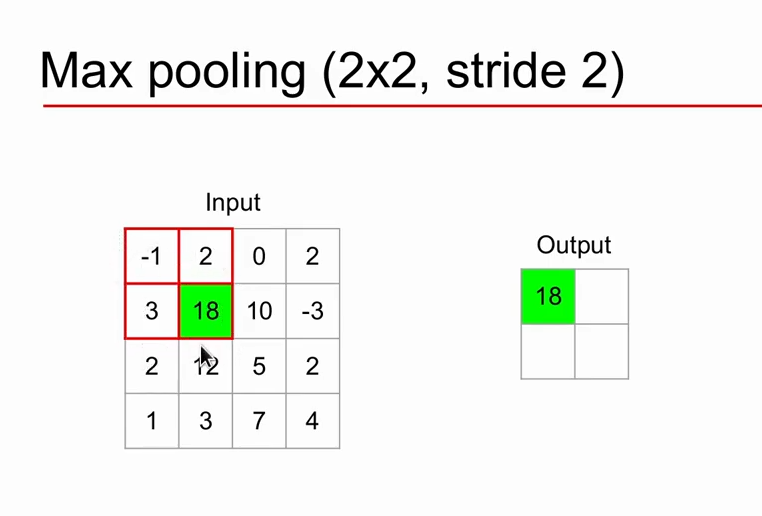
</div>

<div>
    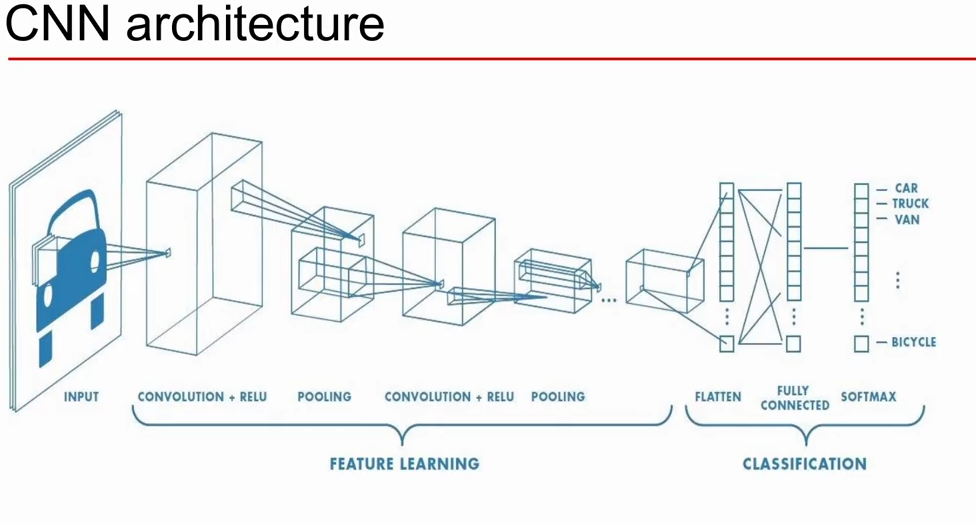
</div>

input -> Feature Learning: convolution/RELU -> Pooling -> Convolution/RELU -> Pooling -> Classification: Flatten -> Fully connected -> softmax -> ANSWER

**Feature Learning**<br> 
At each convolutional layer, we're trying to extract features. Around the beginning, get low-level features (edged, ect.). Moving forward, arrive at shapes. Then arrive at objects<br> 

Abstract higher and higher level features as you move through the network. 

**So how does this apply to audio?**
- Spectrogram/MFCC = image
- Time, frequency = x, y
- Amplitude = pixel value

**Preparing MFCCs for a CNN**
- 13 MFCCs
- Hop length = 512 samples
- \# samples in audio file: 51200

- What's the Data shape we should expect the CNN to be fed with? 
- 100 x 13 x 1
- 100 different time windows, at which we take 13 different values (100=51200/512), and 1 "color"- magnitude


**Question:** *Is there a way to combine MFCCs with spectrogram? would this be useful?*

# 16 - How to Implement a CNN for Music Genre Classification

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

DATASET_PATH = "genre_classification_dataset\\Data\\genres_original\\"
JSON_PATH = "data.json"
DATA_PATH = JSON_PATH

SAMPLE_RATE = 22050
DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def load_data(data_path): 
    """Loads training dataset from file.
    
    :Param: data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets"""
    
    with open(data_path, "r") as fp: 
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size=0.25, validation_size=0.2): 
    
    # load the data
    X, y = load_data(DATA_PATH)
    
    # create the train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                    test_size=validation_size)
    # we can't simply return everything. For a CNN, tensorflow wants a 3D array for each sample. 
    # current shape: (# time bins, # mfccs)
    # what we need: (# time bins, # mfccs, channel (1))
    
    # ... means "give me whatever I have so far"
    X_train = X_train[..., np.newaxis] # this is now a 4d array -> (num_samples, 130, 13, 1) (b/c of numpy)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape): 
    
    # create model
    model = keras.Sequential()
    
    # use .add() to add a layer to the model
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) 
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    
    # The math behind BatchNormalization is pretty complicated (well beyond this scope)
    # intuition: standardizes / normalizes activations in current layer
    # speeds up the training (faster convergence)
    model.add(keras.layers.BatchNormalization())
    
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape)) 
    model.add(keras.layers.MaxPool2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape)) 
    model.add(keras.layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    
    # add dropout to avoid overfitting
    model.add(keras.layers.Dropout(0.3))
    
    # output layer (using softmax)
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model

In [ ]:
# Create train, validation, and test sets
# validation set: evaluate model while tweaking all the hyperparameters
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

# build the CNN net
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
model = build_model(input_shape)

# Compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# train the CNN
model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# evaluate the CNN on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

Accuracy on training set ~75%, validation set ~72% -> this is pretty good!

In [ ]:
def predict(model, X, y):
    
    # prediction = [[0.1, 0.2, ...]]
    X = X[np.newaxis, ...]
    prediction = model.predict(X) # X -> (130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis=1) #[index of prediction]
    print("Expected index: {}, Predicted index: {}".format(y, predicted_index))
    
# make predictions on a sample
X = X_test[100]
y = y_test[100]
predict(model, X, y)

# 17 - Recurring Neural Networks Explained Easily

**RNNs**
- Order is important 
- Variable length
- Used for sequential data
- Each item is processed in context
- Ideal for audio / music

A waveform is a univariate (1 value) time series

data shape: [22050x9, 1]

MFCCs are multivariate time series

data shape: [sr/hop_length x 9, \#MFCCs] = [387, 13]

**Intuition**
- Input data points one at a time
- Predict next step
- Prediction depends on previous data points

**RNN architecture**
x -> recurrent layer -> Dense layer -> y

shape of X = [batch size, # steps, # dimensions]

<div>
    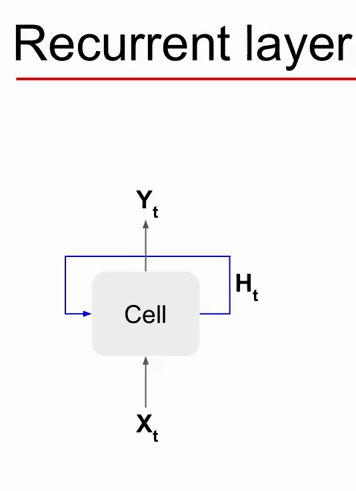
</div>

- H_t = hidden state vector (keeps memory of cell at a certain point in time) 
- y_t = actual output
- The state vector will be re-used at the next step

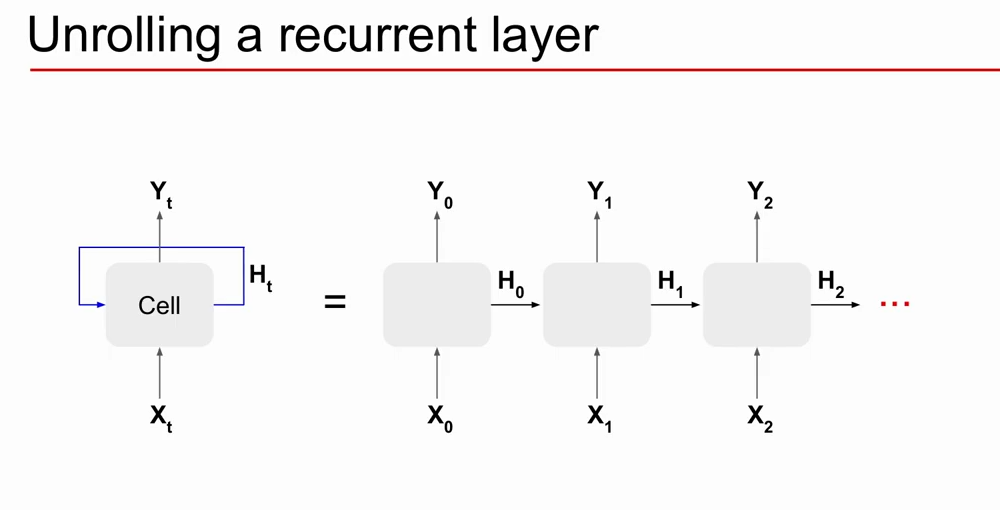

**Very important**: At each time step, we use the same cell

**Data Shape**
- [batch size, # steps, # dimensions] = [2, 9, 1] (univariate time series)
- input at each step = [batch size, # dimensions]
- output at each step = [batch size, # units]
- output shape: [batch size, # steps, # units]

In simple RNNs: dim(Ht) = dim(Yt)

**Sequence to vector RNN**
- input = sequence, output = vector
- drop all other predictions, only insterested in the last prediction
- EX: used in generating melodies

**Sequence to sequence RNN**
- Consider all outputs at each time step 
- input a batch of sequences, and  get a batch of sequences back (less common)
- This is the default behavior of Keras

**Memory cell for simple RNN
- Dense Layer
- Input = state vector + input data
- Activation function = tanh

**Why do we use tanh?**
- Training RNNs is difficult
- Vanishing gradients + exploding gradients
- RELU can explode!
- tanh maintains values in [-1, 1]

**Backpropogation through time (BPTT)**
- Error is back propagated through time
- RNN is unrolled and treated as a feedforward network
- Very deep network!
- prone to vanishing or exploding gradients (like a knifeedge)

But there's a way to avoid this!

- Use a sequence-to-sequence approach
- when training, output predictions at each timestamp and compare against targets
- Then drop all the sequence-to-sequence predictions!

**The math behind an RNN**
- focus on one timestep
- $x_t$ = input vector at t
- $h_t$ = state vector at t
- $y_t$ = output vector at t
- $h_{t-1}$ = state vector from previous t
- $U$, $W$, $V$ = some functions relating to xt, ht, and V
$$
h_t = f(Ux_t + Wh_{t-1})
$$

$$
y_t = \operatorname{softmax}(Vh_{t})
$$

- What do we learn when training? 
- We learn U, W, and V - the **Weight memories**

**Issues with simple RNNs**
- No long-term memory
- Network can't use info from distant past
- Can't learn patterns with long dependencies
- This means that it can't capture long-term musical structure (e.g. verse, chorus, ect...)

# 18 - Long Short Term Memory (LSTM) Networks Explained Easily

**Issues with simple RNNs**
- No long-term memory
- Network can't use info from the distant past
- Can't learn new patterns with long dpeendencies

**Long Short Term Memory (LSTM)
- Special type of RNN
- Can learn long-term patterns
- Detects patterns with 100 steps
- Struggles with 100s/1000s steps

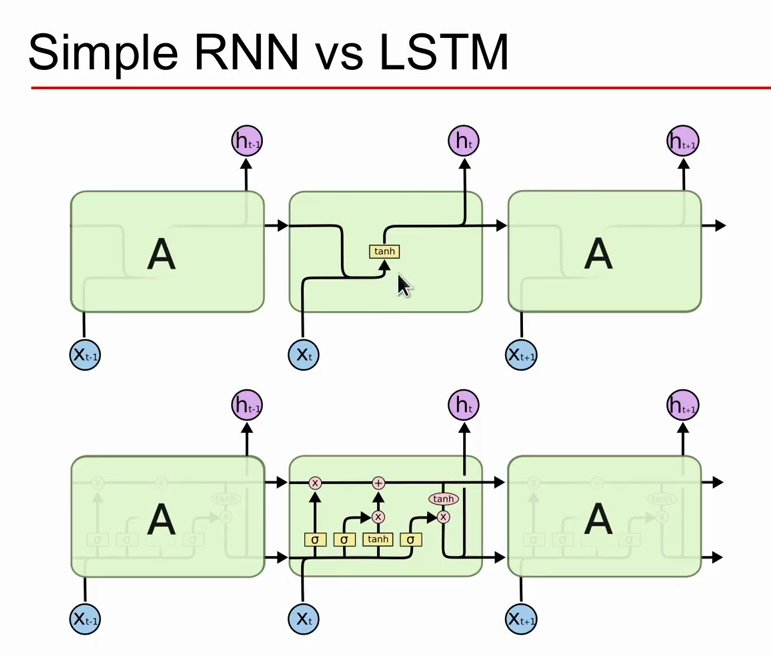

**LSTM cell**
- Contains a simple RNN cell
- Second state vector = cell state = long-term memory
- Forget gate
- Input gate
- Output gate
- Gates work as filters

**Idea: Can there be an analogy drawn between analyses at different length / energy scales in fluid dynamics and memory 'ranges' in recurrent neural networks? This is reminding me of that energy cascade in quantum turbulence**

- x_t = input (data point) 
- h_t = short-term memory / hidden state
- C_t = cell state
    - Cell state updated twice
    - Few computations -> stabilize gradients
    - Only updated at 2 points
- We're essentialy training this network on which patterns to remember and which to forget

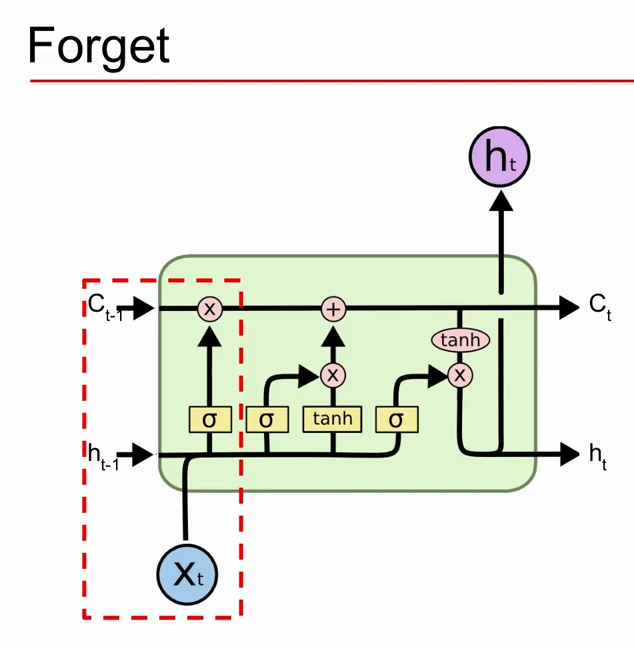

Forget Matrix: 
$$
f_t = \sigma(W_f[h_{t-1}, x_t] + b_f)
$$

result of the forget gate. Concatenate input (X_t) with the hidden state vector from the previous time step. 

**element-wise multiplication**
$$
C_t^f = C_{t-1} * f_t
$$

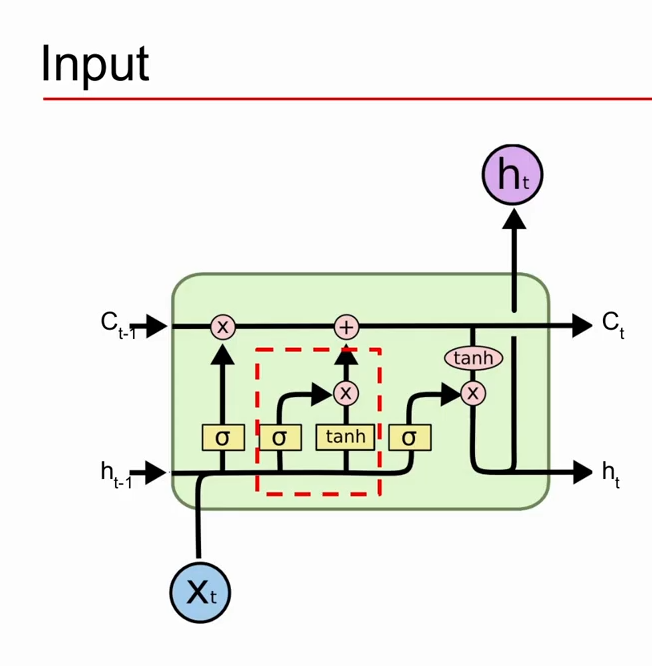

Input gate acts as a filter on the simple RNN component 

$$
i_t = \sigma(W_i[h_{t-1}, x_t] + b_i)
$$

$$
C_t' = \tanh(W_c[h_{t-1}, x_t] + b_C)
$$

$$
C_t^i = C_t' * i_t
$$

We are modulating the cell state, same thing we did with forget.<br> 
i_t will decide what's important to keep

Cell state at current time step: 
$$
C_t = C_t^f + C_t^i
$$

**Idea: is there a version of this with multiple cell states the forget / modulate with different relative difficulties that store info on consecutively longer time scales?**

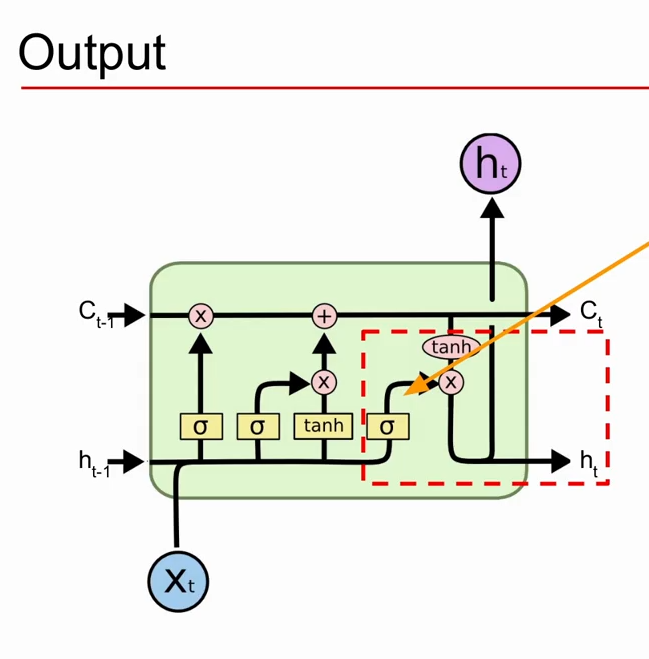

$$
\sigma_t = \sigma(W_0[h_{t-1}, x_t] + b_o)
$$

$$
h_t = o_t * \tanh(C_t)
$$

**LSTM Variants**
- Gated Recurrent Unit - GRU

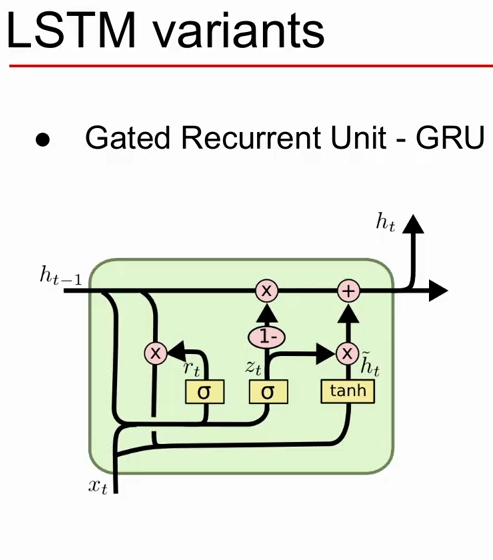

# 19 - How to Implement an RNN-LSTM Network for Music Genre Classification

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

DATASET_PATH = "genre_classification_dataset\\Data\\genres_original\\"
JSON_PATH = "data.json"
DATA_PATH = JSON_PATH

SAMPLE_RATE = 22050
DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def load_data(data_path): 
    """Loads training dataset from file.
    
    :Param: data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets"""
    
    with open(data_path, "r") as fp: 
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size=0.25, validation_size=0.2): 
    
    # load the data
    X, y = load_data(DATA_PATH)
    
    # create the train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                    test_size=validation_size)
    
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape): 
    # Generate an RNN-LSTM model
    
    # Create model
    model = keras.Sequential()
    
    # 2 LSTM layers
    # return_sequences: this is a sequence-to-sequence layer b/c we want to pass this to the second LSTM layer
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    
    # this one is a sequence-to-vector layer (default)
    model.add(keras.layers.LSTM(64))
    
    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    
    # dropout layer
    model.add(keras.layers.dropout(0.3))
    
    # output layer (using softmax)
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model

In [ ]:
input_shape

In [ ]:
# Create train, validation, and test sets
# validation set: evaluate model while tweaking all the hyperparameters
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
# this uses 1/4th of the dataset, and of the 75% remaining, use 20% for the validation set

# build the CNN net
input_shape = (X_train.shape[1], X_train.shape[2]) # 130 x 13
model = build_model(input_shape)

# Compile the network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# train the CNN
model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# evaluate the CNN on the test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

The above isn't working for some reason- not entirely sure why. Will probably fix it later